In [147]:
# OBTENCION DE DATOS Y CARGA DE DATOS
import numpy as np
import pandas as pd

data = pd.read_csv("dataset/german.csv", sep=';')


In [148]:
# Imprimir los primeros 5 registros del DataFrame
display(data)


,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,3,2,3,...,4,1,21,3,1,1,2,2,1,1
996,0,1,24,2,0,2303,1,5,4,3,...,1,1,45,3,2,1,3,1,1,1
997,0,4,21,4,0,12680,5,5,4,3,...,4,4,30,3,3,1,4,1,2,1
998,0,2,12,2,3,6468,5,1,2,3,...,1,4,52,3,2,1,4,1,2,1


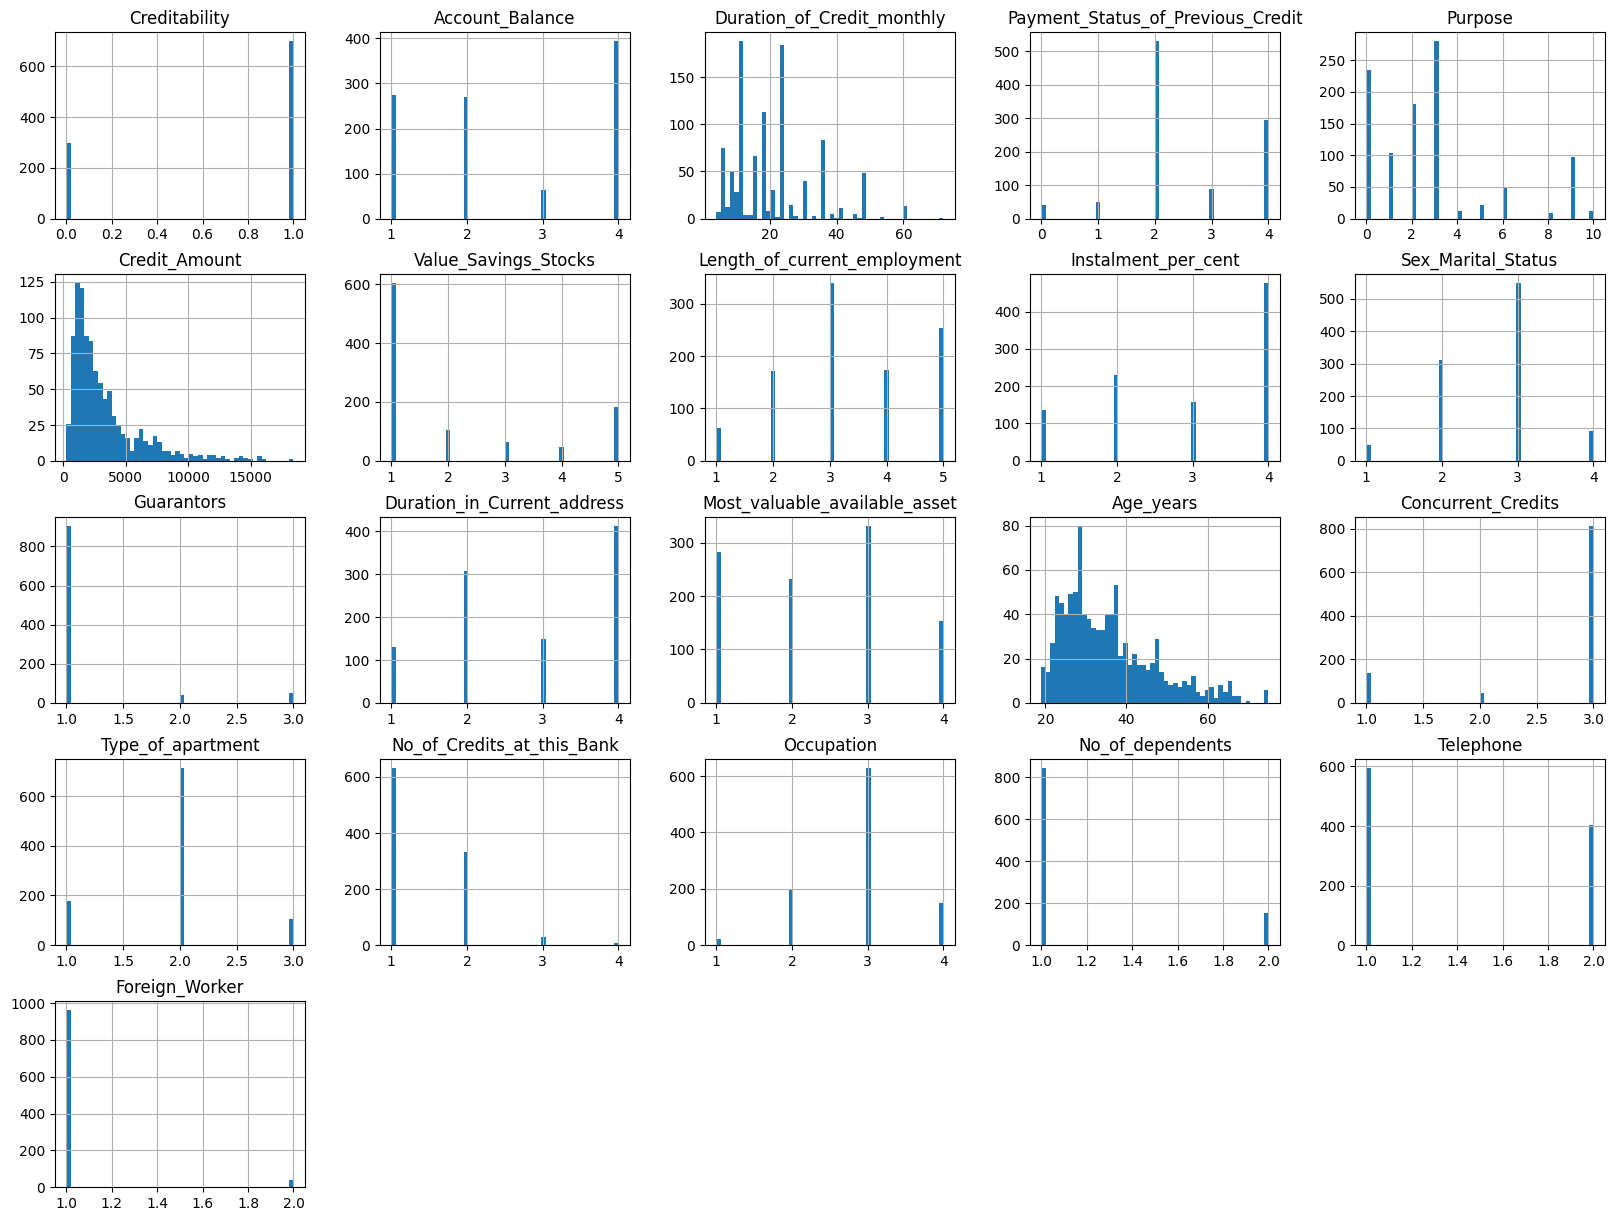

In [149]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

In [150]:
# Creamos modelo de evaluacion

from sklearn.model_selection import train_test_split

# Separa el conjunto de datos en las características (X) y la variable objetivo (y)
X = data.drop('Creditability', axis=1)
y = data['Creditability']

In [138]:
# NO SE FALTA ESTO EN ESTE EJERCICIO

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

imputer.fit(data)

X = imputer.transform(data)

d = pd.DataFrame(X,
                          columns=data.columns,
                          index= data.index)

In [139]:
data.head(10)

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
5,1,1,10,4,0,2241,1,2,1,3,...,3,1,48,3,1,2,2,2,1,2
6,1,1,8,4,0,3398,1,4,1,3,...,4,1,39,3,2,2,2,1,1,2
7,1,1,6,4,0,1361,1,2,2,3,...,4,1,40,3,2,1,2,2,1,2
8,1,4,18,4,3,1098,1,1,4,2,...,4,3,65,3,2,2,1,1,1,1
9,1,2,24,2,3,3758,3,1,1,2,...,4,4,23,3,1,1,1,1,1,1


In [152]:
# Divide los datos en un conjunto de entrenamiento y un conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train, X_test)

     Account_Balance  Duration_of_Credit_monthly   
29                 3                          42  \
535                2                          24   
695                4                          60   
557                3                          12   
836                4                          18   
..               ...                         ...   
106                4                          12   
270                4                           6   
860                4                          48   
435                4                           7   
102                2                          24   

     Payment_Status_of_Previous_Credit  Purpose  Credit_Amount   
29                                   4        1           4796  \
535                                  2        3           1967   
695                                  3        3          15653   
557                                  2        2           1474   
836                                  0       

In [153]:
# Creo las variables que detectan ("Creditability"=1)

train_y_1 = (y_train == 1)
test_y_1 = (y_test == 1)

print(list(filter(lambda X: X, test_y_1.tolist())))

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


In [155]:
# Utilizo clasificador binario
from sklearn.linear_model import SGDClassifier 

# Hago pipeline donde escalo
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SGDClassifier())
]) 


In [156]:
# Entrenamos el modelo
pipeline.fit(X_train, train_y_1)

print(y)    #para ver los datos de la columna "creditability"

pipeline.predict(X_test)

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Creditability, Length: 1000, dtype: int64


array([False,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True, False, False,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True, False,  True,  True, False,  True, False,  True,
       False, False,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True, False, False,  True, False,  True,  True,
       False,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False, False,  True,  True, False,  True,  True, False, False,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
       False,  True,

In [157]:
# ACCURACY

from sklearn.model_selection import cross_val_score

cross_val_score(pipeline, X_train, train_y_1, cv=3, scoring="accuracy")

array([0.70411985, 0.73782772, 0.64285714])

In [161]:
#El accuracy es bastante bajo asique voy a definir hiperparametros y ver si mejora
#usare gridsearch para encontrar los mejores hiperparametros
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

param_grid={
       'alpha': [0.001, 0.01, 0.1, 1],
    'max_iter': [1000, 5000],
    'tol': [0.0001, 0.001]
    
}

#defino la funcion de busqueda en cuadricula
GridSearch=GridSearchCV(SGDClassifier(),param_grid,cv=3,scoring='accuracy')
#entreno el modelo en funcion de busqueda de cuadricula
GridSearch.fit(X_train,train_y_1)

#Busco los mejores hiperparametros 
best_params=GridSearch.best_params_
#Re entreno con los mejores parametros

#Defino el mejor modelo
best_model=SGDClassifier(**best_params,random_state=42)
#Defino el mejor pipeline
best_pipeline = make_pipeline(
    StandardScaler(),
    best_model
)
#Re entreno el modelo
best_pipeline.fit(X_train,train_y_1)
accuracy=cross_val_score(best_pipeline,X_train,train_y_1,cv=3,scoring='accuracy')
print("SGD con hiperparametros: ",accuracy)




SGD con hiperparametros:  [0.74906367 0.78277154 0.73308271]
